In [10]:
import pandas as pd

# فرض کن فایل CSV رو بارگذاری کردی
df = pd.read_csv('prompt_response_dataset.csv')

# تعداد پرامپت‌ها (تعداد کل ردیف تقسیم بر 3)
num_prompts = len(df) // 3

labels = []
for _ in range(num_prompts):
    labels.extend([2, 1, 0])

df['quality_label'] = labels

print(df.head(9))


                                              prompt  \
0    Explain the concept of gravity in simple terms.   
1    Explain the concept of gravity in simple terms.   
2    Explain the concept of gravity in simple terms.   
3     Summarize the story of Little Red Riding Hood.   
4     Summarize the story of Little Red Riding Hood.   
5     Summarize the story of Little Red Riding Hood.   
6  Translate the sentence 'Knowledge is power' in...   
7  Translate the sentence 'Knowledge is power' in...   
8  Translate the sentence 'Knowledge is power' in...   

                                            response  response_id  \
0  Gravity is the force by which a planet or othe...            1   
1  Gravity is like a magnet that pulls things dow...            2   
2                  Gravity is when things fall down.            3   
3  Little Red Riding Hood is a story about a girl...            1   
4          A girl wears a red hood and meets a wolf.            2   
5                        

In [12]:
# روش 1: استفاده از len
print('Total rows:', len(df))

# روش 2: استفاده از shape (تعداد ردیف‌ها اولین مقدار در shape است)
print('Total rows:', df.shape[0])

# روش 3: استفاده از تابع count روی یک ستون (مثلا اولین ستون)
print('Total rows:', df['prompt'].count())


Total rows: 60
Total rows: 60
Total rows: 60


In [ ]:
!pip install sentence-transformers


In [21]:
print(df.columns)


Index(['prompt', 'response', 'response_id', 'prompt_emb', 'response_emb',
       'prompt_response_sim', 'length', 'quality_label'],
      dtype='object')


In [18]:
# فرض: هر 3 پاسخ مربوط به یک prompt هست، پس:
labels = []
num_prompts = len(df) // 3
for _ in range(num_prompts):
    labels.extend([2, 1, 0])

# اضافه کردن به دیتافریم
df['quality_label'] = labels


In [20]:
y = df['quality_label']


In [25]:
import pandas as pd

# خواندن فایل CSV (فرض می‌کنیم نام فایل responses.csv است)
df = pd.read_csv("prompt_response_dataset.csv")

# ساخت ستون کیفیت بر اساس response_id
df['quality_label'] = df['response_id'].map({1: 2, 2: 1, 3: 0})


In [26]:
print(df[['prompt', 'response_id', 'quality_label']].head(9))


                                              prompt  response_id  \
0    Explain the concept of gravity in simple terms.            1   
1    Explain the concept of gravity in simple terms.            2   
2    Explain the concept of gravity in simple terms.            3   
3     Summarize the story of Little Red Riding Hood.            1   
4     Summarize the story of Little Red Riding Hood.            2   
5     Summarize the story of Little Red Riding Hood.            3   
6  Translate the sentence 'Knowledge is power' in...            1   
7  Translate the sentence 'Knowledge is power' in...            2   
8  Translate the sentence 'Knowledge is power' in...            3   

   quality_label  
0              2  
1              1  
2              0  
3              2  
4              1  
5              0  
6              2  
7              1  
8              0  


In [28]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

# محاسبه طول پاسخ
df['length'] = df['response'].apply(lambda x: len(x.split()))

# استخراج embedding
df['prompt_emb'] = df['prompt'].apply(lambda x: model.encode(x))
df['response_emb'] = df['response'].apply(lambda x: model.encode(x))

# شباهت معنایی
df['prompt_response_sim'] = df.apply(lambda row: cosine_similarity(
    [row['prompt_emb']], [row['response_emb']])[0][0], axis=1)


In [29]:
print(df[['prompt', 'response', 'length', 'prompt_response_sim']].iloc[0])


prompt                   Explain the concept of gravity in simple terms.
response               Gravity is the force by which a planet or othe...
length                                                                28
prompt_response_sim                                             0.748191
Name: 0, dtype: object


In [32]:
pd.set_option('display.max_columns', None)  # نمایش همه ستون‌ها
pd.set_option('display.max_rows', 100)      # تنظیم نمایش تا 100 ردیف (یا بیشتر)
df.head(5)  # نمایش 10 ردیف اول


,prompt,response,response_id,quality_label,length,prompt_emb,response_emb,prompt_response_sim
0,Explain the concept of gravity in simple terms.,Gravity is the force by which a planet or othe...,1,2,28,"[-0.008768544, -0.02019046, -0.028785856, 0.02...","[0.04485038, -0.021242986, -0.037762687, -0.01...",0.748191
1,Explain the concept of gravity in simple terms.,Gravity is like a magnet that pulls things dow...,2,1,12,"[-0.008768544, -0.02019046, -0.028785856, 0.02...","[0.010639647, -0.03844929, 0.059268467, 0.0307...",0.716368
2,Explain the concept of gravity in simple terms.,Gravity is when things fall down.,3,0,6,"[-0.008768544, -0.02019046, -0.028785856, 0.02...","[0.017064612, -0.038668144, 0.024358915, 0.026...",0.699851
3,Summarize the story of Little Red Riding Hood.,Little Red Riding Hood is a story about a girl...,1,2,23,"[-0.00047453618, 0.11129878, -0.081909046, 0.1...","[-0.001987651, 0.02928372, -0.04755717, 0.1297...",0.779903
4,Summarize the story of Little Red Riding Hood.,A girl wears a red hood and meets a wolf.,2,1,10,"[-0.00047453618, 0.11129878, -0.081909046, 0.1...","[-0.023492789, -0.017843895, -0.0028641128, 0....",0.437633


In [33]:
df.drop(columns=['prompt_emb', 'response_emb']).to_csv("llm_responses_features.csv", index=False)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # مدل قابل‌درک و دقیق
from sklearn.metrics import classification_report, accuracy_score

# فقط ویژگی‌هایی که برای آموزش استفاده می‌کنیم:
features = ['length', 'prompt_response_sim']
X = df[features]
y = df['quality_label']

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی روی داده تست
y_pred = model.predict(X_test)

# ارزیابی مدل
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75
Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.40      1.00      0.57         2
           2       1.00      0.75      0.86         8

    accuracy                           0.75        12
   macro avg       0.80      0.75      0.70        12
weighted avg       0.90      0.75      0.78        12



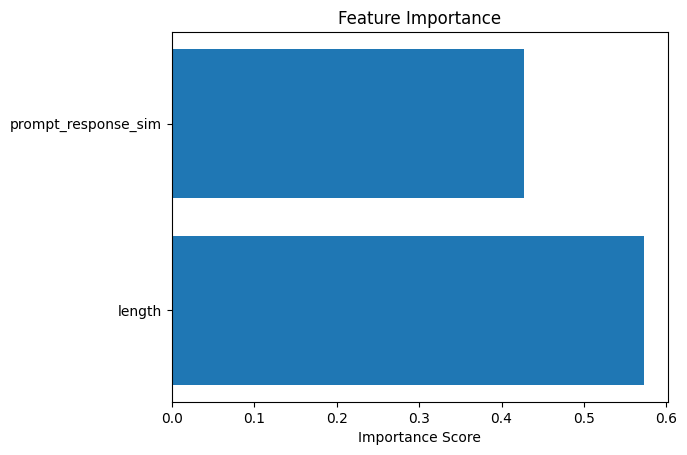

In [35]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
!pip install textstat

In [39]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [42]:
import nltk
import textstat
from sentence_transformers import SentenceTransformer, util
import pandas as pd

nltk.download('punkt')

# فرض می‌کنیم df داده‌های شما است
def extract_features(row):
    prompt = row['prompt']
    response = row['response']
    
    # طول پاسخ
    length = len(response.split())
    
    # پیچیدگی واژگان (Flesch-Kincaid)
    readability = textstat.flesch_kincaid_grade(response)
    
    # تعداد جملات
    sentences = nltk.sent_tokenize(response)
    num_sentences = len(sentences)
    
    # میانگین طول جمله
    avg_sentence_length = sum(len(s.split()) for s in sentences) / num_sentences if num_sentences > 0 else 0
    
    # شباهت معنایی با Sentence-BERT
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode([prompt, response])
    bert_similarity = util.cos_sim(embeddings[0], embeddings[1])[0][0].item()
    
    return pd.Series({
        'length': length,
        'readability': readability,
        'num_sentences': num_sentences,
        'avg_sentence_length': avg_sentence_length,
        'bert_similarity': bert_similarity
    })

# اعمال ویژگی‌ها به داده‌ها
df_features = df.apply(extract_features, axis=1)
df = pd.concat([df, df_features], axis=1)

# ذخیره ویژگی‌های جدید
features = ['length', 'readability', 'num_sentences', 'avg_sentence_length', 'bert_similarity']

# آموزش مدل
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df[features]
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

# اهمیت ویژگی‌ها
import matplotlib.pyplot as plt
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/models/sentence-transformers/all-MiniLM-L6-v2/c9745ed1d9f207416be6d2e6f8de32d1f16199bf/1_Pooling%2Fconfig.json
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/models/sentence-transformers/all-MiniLM-L6-v2/c9745ed1d9f207416be6d2e6f8de32d1f16199bf/1_Pooling%2Fconfig.json
Retrying in 2s [Retry 2/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/models/sentence-transformers/all-MiniLM-L6-v2/c9745ed1d9f207416be6d2e6f8de32d1f16199bf/1_Pooling%2Fconfig.json
Retrying in 4s [Retry 3/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/api/resolve-cache/models/sentence-transformers/all-MiniLM-L6-v2/c9745ed1d9f207416be6d2e6f8de32d1f16199bf/1_Pooling%2Fconfi

KeyboardInterrupt: 